[-4.32142857 -2.96428571 -2.53571429 -0.67857143 -0.44879895 -0.32142857
 -0.17857143 -0.10714286 -0.03571429  0.03571429  0.10714286  0.17857143
  0.46428571  1.46428571  1.53571429]


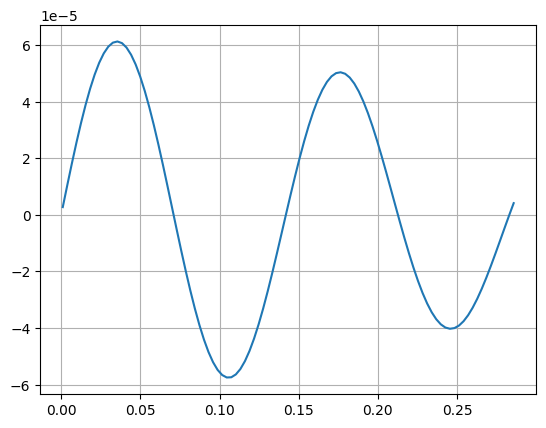

In [1]:
#Derivada corriente inducida
'''
2. Grafique la corriente inducida sobre el bucle en funcion del tiempo para B0 = 0,05T, f = 1000Hz, Ω =
3,5rad/s. Recuerde que por la ley de Faraday-Lenz, I = −1RdϕBdt .

'''
import numpy as np
import matplotlib.pyplot as plt
import math as m

f = 7
T = 1/f
B0 = 0.05
v = 3.5
r = 0.125
R = 1.75E3
t = np.linspace(0.001,2*T,100)
def Funcion(tiempos):
    return np.pi*(r**2)*B0*(np.cos(v*tiempos))*(np.cos(2*np.pi*f*tiempos))

def derivative(tiempos):
    return np.pi*(r**2)*B0*(-v*np.sin(v*tiempos)*np.cos(2*np.pi*f*tiempos)-(2*np.pi*f*np.sin(2*np.pi*f*tiempos))*np.cos(v*tiempos))

#Derivada central
def DerivadaCentral(f,t,h=0.001):
    
    d = 0.
    
    if h != 0:
        d = (f(t + h) - f(t - h))/(2*h)
        
    return d

def corriente_inducida(derivative):
    I = -(1/R)*(derivative(t))
    return I

def GetNewton(f,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/DerivadaCentral(f,xn)
            
            error = np.abs(f(xn)/DerivadaCentral(f,xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn
    

def GetAllRoots(f,t, tolerancia=10):
    
    Roots = np.array([])
    
    for i in t:
        
        root = GetNewton(f,i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
    
    return Roots

raices = GetAllRoots(Funcion,DerivadaCentral(Funcion,t,h=0.001))
print(raices)
plt.plot(t,corriente_inducida(derivative))
plt.grid()
plt.show()